# MNIST - Numbers Identification

## Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

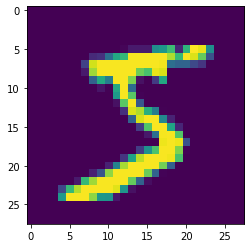

In [5]:
image=x_train[0]
plt.imshow(image)

## Data Preprocessing

### Converting Target Variable

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Scaling and Reshaping Data

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Model Creation and Training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [12]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3469 - accuracy: 0.8952 - val_loss: 0.0519 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0556 - accuracy: 0.9832 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0262 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0351 - val_ac

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.153236,0.953400,0.051866,0.9819
1,0.050331,0.984400,0.035564,0.9877
2,0.035983,0.988600,0.030895,0.9902
3,0.025877,0.991617,0.026226,0.9909
4,0.020064,0.993433,0.028490,0.9900
5,0.015815,0.994800,0.029140,0.9903
6,0.012026,0.996167,0.035144,0.9898
7,0.010098,0.996833,0.035155,0.9891
8,0.010178,0.996517,0.036505,0.9895
9,0.007421,0.997583,0.042562,0.9895


## Visualising Model Performance

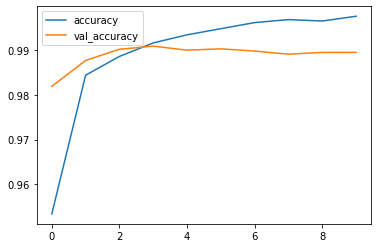

In [14]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

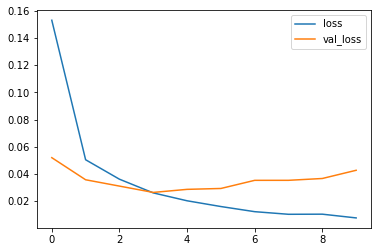

In [15]:
metrics[['loss','val_loss']].plot()
plt.show()

## Saving Model

In [16]:
model.save('MNIST.h5')